In [96]:
#Import the dataset

import pandas as pd
import numpy as np
df = pd.read_csv('winequality.csv')

--> The data is read from 'winequality.csv' and saved in to data frame 'df'.

In [97]:
print(df.head())

    type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


--> The data info is printed and it has 6497 records with 13 columns
    quality - (Target variable) with values from 3 to 9
    The remaining 12 predictors which have datatype of int, float and String. Some of the columns have few missing values.

In [99]:
# Finding if there are any duplicate records
df.duplicated().sum()

1168

--> There are 1168 duplicate observations in the data. So we will drop them.

In [100]:
# Dropping the duplicate entries
df = df.drop_duplicates()

In [101]:
# Identifying the shape of the data structure
df.shape

(5329, 13)

 --> After droping the duplicates, we have 5329 rows and 13 columns.

In [102]:
#Finding the number of missing values in each column
df.isna().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

--> We could see that the missing values are : fixed_acidity - 10, volatile_acidity - 8, citric_acid - 3, 
    residual_sugar - 2, chlorides - 2, pH - 9 and sulphates - 4


In [103]:
#Fixing missing values in 'fixed_acidity'
df.loc[(df.fixed_acidity.isna()) & (df.type == 'white'),['fixed_acidity']] = round(df[(df.fixed_acidity.notnull()) & (df.type == 'white')]['fixed_acidity'].mean(),1)
df.loc[(df.fixed_acidity.isna()) & (df.type == 'red'),['fixed_acidity']] = round(df[(df.fixed_acidity.notnull()) & (df.type == 'red')]['fixed_acidity'].mean(),1)

#Fixing missing values in 'volatile_acidity'
df.loc[(df.volatile_acidity.isna()) & (df.type == 'white'),['volatile_acidity']] = round(df[(df.volatile_acidity.notnull()) & (df.type == 'white')]['volatile_acidity'].mean(),2)
df.loc[(df.volatile_acidity.isna()) & (df.type == 'red'),['volatile_acidity']] = round(df[(df.volatile_acidity.notnull()) & (df.type == 'red')]['volatile_acidity'].mean(),2)

#Fixing missing values in 'citric_acid'
df.loc[(df.citric_acid.isna()) & (df.type == 'white'),['citric_acid']] = round(df[(df.citric_acid.notnull()) & (df.type == 'white')]['citric_acid'].mean(),2)
df.loc[(df.citric_acid.isna()) & (df.type == 'red'),['citric_acid']] = round(df[(df.citric_acid.notnull()) & (df.type == 'red')]['citric_acid'].mean(),2)

#Fixing missing values in 'residual_sugar'
df.loc[(df.residual_sugar.isna()) & (df.type == 'white'),['residual_sugar']] = round(df[(df.residual_sugar.notnull()) & (df.type == 'white')]['residual_sugar'].mean(),2)
df.loc[(df.residual_sugar.isna()) & (df.type == 'red'),['residual_sugar']] = round(df[(df.residual_sugar.notnull()) & (df.type == 'red')]['residual_sugar'].mean(),2)

#Fixing missing values in 'chlorides'
df.loc[(df.chlorides.isna()) & (df.type == 'white'),['chlorides']] = round(df[(df.chlorides.notnull()) & (df.type == 'white')]['chlorides'].mean(),3)
df.loc[(df.chlorides.isna()) & (df.type == 'red'),['chlorides']] = round(df[(df.chlorides.notnull()) & (df.type == 'red')]['chlorides'].mean(),3)

#Fixing missing values in 'pH'
df.loc[(df.pH.isna()) & (df.type == 'white'),['pH']] = round(df[(df.pH.notnull()) & (df.type == 'white')]['pH'].mean(),2)
df.loc[(df.pH.isna()) & (df.type == 'red'),['pH']] = round(df[(df.pH.notnull()) & (df.type == 'red')]['pH'].mean(),2)

#Fixing missing values in 'sulphates'
df.loc[(df.sulphates.isna()) & (df.type == 'white'),['sulphates']] = round(df[(df.sulphates.notnull()) & (df.type == 'white')]['sulphates'].mean(),2)
df.loc[(df.sulphates.isna()) & (df.type == 'red'),['sulphates']] = round(df[(df.sulphates.notnull()) & (df.type == 'red')]['sulphates'].mean(),2)

--> The missing values in each column is filled with the mean value of the variable according to the wine type.

In [104]:
df.isna().mean()

type                    0.0
fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [105]:
# Describing the dataset
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,7.216354,0.344074,0.318733,5.054164,0.056664,30.060143,114.189341,0.994536,3.224434,0.533299,10.548539,5.796022
std,1.318221,0.168137,0.147077,4.503191,0.036838,17.815588,56.781422,0.002966,0.160151,0.149690,1.186134,0.879922
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


--> The 5 number summary, mean and standard deviation of each column is displayed above.

                                             BIVARIATE ANALYSIS

In [12]:
# Importing the required packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

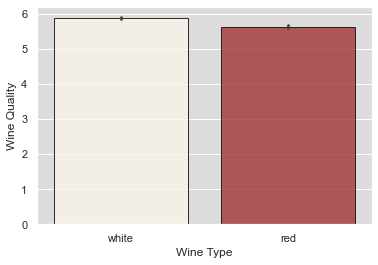

In [14]:
# Finding the mean wine quality of the different type of wine
ax = sns.barplot(x="type", y="quality", data=df,palette=["oldlace", "firebrick"],edgecolor='black',alpha=0.8)
ax.set(xlabel="Wine Type", ylabel = "Wine Quality")
ax.set_facecolor("gainsboro")

--> The mean quality of white wine is about 5.9 and red wine is 5.5 

<ipython-input-16-61b8a5fae744>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


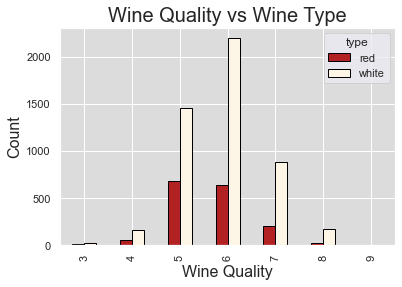

In [16]:
# Finding the frequency distribution of the quality according to wine type
pd.crosstab(df.quality,df.type).plot(kind = 'bar',color = ['firebrick','oldlace'],edgecolor='black')
ax = plt.axes()
ax.set_facecolor("gainsboro")

plt.xlabel('Wine Quality', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Wine Quality vs Wine Type',fontsize=20)

plt.show()

In [18]:
# Creating contgency table
contigency_table = pd.crosstab(df.quality,df.type)
print(contigency_table)

type     red  white
quality            
3         10     20
4         53    163
5        681   1457
6        638   2198
7        199    880
8         18    175
9          0      5


--> Contigency table is created as shown above.

In [19]:
# Performing chi-squared test to test the independency
from scipy.stats.contingency import chi2_contingency

chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

In [20]:
print("P-value = :",p_val)
print("DOF = :",dof)

P-value = : 8.66434779598271e-23
DOF = : 6


In [21]:
#set significance level here
sig_lev = 0.05
if p_val < sig_lev:
    print("There is some correlation between the two variables at significance level {}".format(sig_lev))
else:
    print("There is no correlation between the two variables")

There is some correlation between the two variables at significance level 0.05


--> As the chi-squared p_val < 0.05, we reject the null hypothesis that the variables are independent at significance level 0.05. To conclude they have some correlation with each other and mean quality or wine types are different.

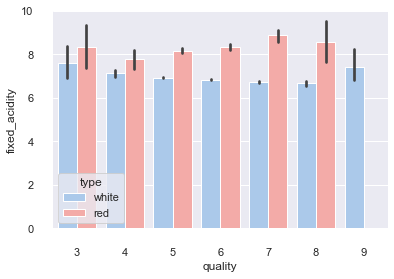

In [22]:
# Grouped bar plot for quality vs fixed_acidity for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.barplot(x="quality", y="fixed_acidity",hue="type", palette=["b", "r"],data=df)
sns.despine(offset=10, trim=True)

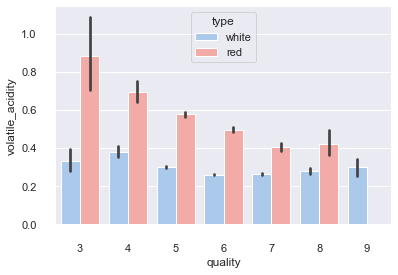

In [23]:
# Grouped bar plot for quality vs volatile_acidity for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.barplot(x="quality", y="volatile_acidity",hue="type", palette=["b", "r"],data=df)
sns.despine(offset=10, trim=True)

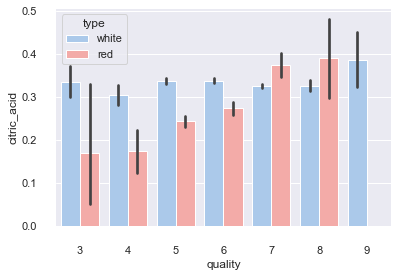

In [24]:
# Grouped bar plot for quality vs citric_acid for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.barplot(x="quality", y="citric_acid",hue="type", palette=["b", "r"],data=df)
sns.despine(offset=10, trim=True)

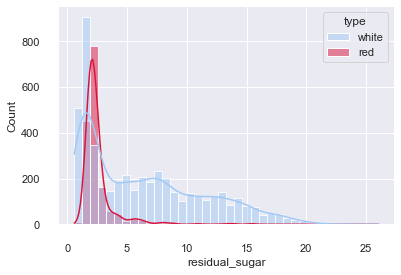

In [31]:
# Removing outliers
df.drop(df[df.residual_sugar >= 30].index, inplace=True)

# Grouped histogram for residual_sugar distribution for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.histplot(data=df, x="residual_sugar",hue="type", label="Sepal Length",palette=["b", "crimson"], kde=True)
sns.despine(offset=10, trim=True)

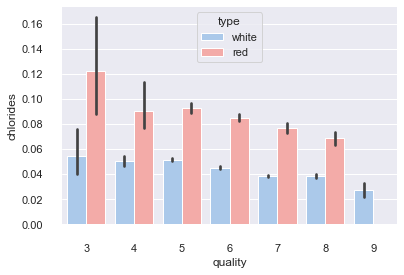

In [28]:
# Grouped bar plot for quality vs chlorides for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.barplot(x="quality", y="chlorides",hue="type", palette=["b", "r"],data=df)
sns.despine(offset=10, trim=True)

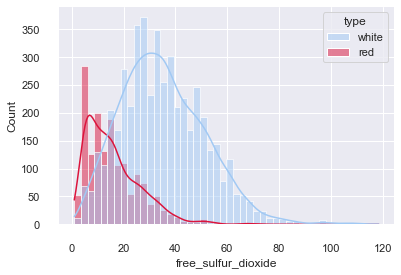

In [30]:
# Removing outliers
df.drop(df[df.free_sulfur_dioxide >= 120].index, inplace=True)

# Grouped histogram for distribution of free_sulfur_dioxide for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.histplot(x="free_sulfur_dioxide", hue="type", palette=["b", "crimson"],data=df, kde=True)
sns.despine(offset=10, trim=True)

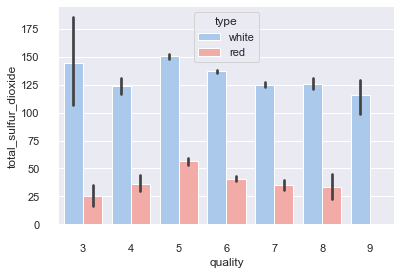

In [34]:
# Grouped bar plot for quality vs total_sulfur_dioxide for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.barplot(x="quality", y="total_sulfur_dioxide",hue="type", palette=["b", "r"],data=df)
sns.despine(offset=10, trim=True)

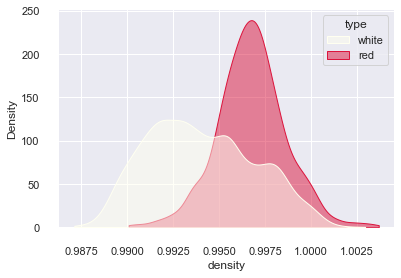

In [35]:
# Grouped density plot for wine types vs density
sns.set_theme(style="darkgrid", palette="pastel")
sns.kdeplot(data=df, x="density", hue="type", cut=0, fill=True, common_norm=False, alpha=0.5,palette=["ivory", "crimson"])
sns.despine(offset=10, trim=True)

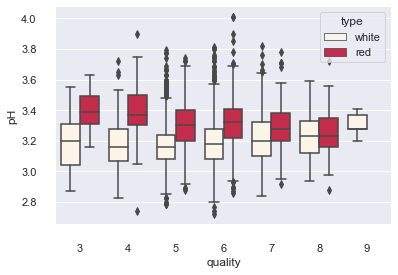

In [36]:
# Grouped box plot for quality vs pH for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.boxplot(x="quality", y="pH",hue="type", palette=["oldlace", "crimson"],data=df)
sns.despine(offset=10, trim=True)

--> pH values range can be from 2.6 to 4.2 in wine. Wine's chemical and biological stability are very dependent on pH value. Lower pH values are known to improve the stability, so winemakers usually prefer a pH range of 3.0 to 3.5. Hence the values which seems to be outliers in the box plot are not actual outliers and hence are not removing them.

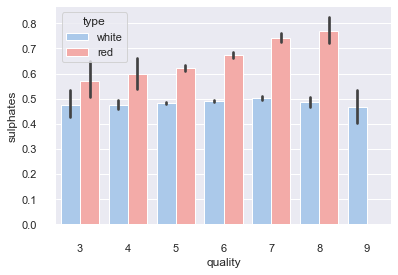

In [37]:
# Grouped box plot for quality vs sulphates for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.barplot(x="quality", y="sulphates",hue="type", palette=["b", "r"],data=df)
sns.despine(offset=10, trim=True)

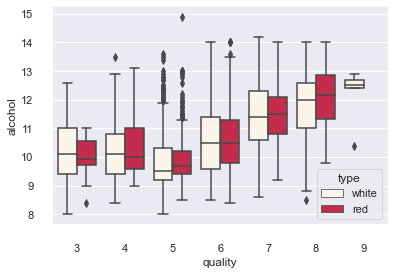

In [38]:
# Grouped box plot for quality vs alcohol for wine types
sns.set_theme(style="darkgrid", palette="pastel")
sns.boxplot(x="quality", y="alcohol",hue="type", palette=["oldlace", "crimson"],data=df)
sns.despine(offset=10, trim=True)

--> ABV is the global standard of measurement for alcohol content. The range of ABV for unfortified wine is about 5.5% to 16%. with an average of 10.5% in our case.

[Text(0.5, 0, 'Wine Quality'), Text(0, 0.5, 'Count')]

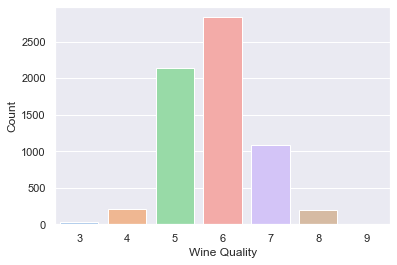

In [40]:
# Univariate analysis of the frequency of each wine quality
quality = df['quality'].value_counts().index
count = df['quality'].value_counts().values
ax = sns.barplot(x=quality,y=count)
ax.set(xlabel='Wine Quality', ylabel='Count')

In [106]:
# Shuffling the data
df = df.sample(frac = 1, random_state=0)

In [107]:
# Do encoding for the categorical variable Type
df = pd.get_dummies(df, ['type'])
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
3175,7.8,0.21,0.34,11.9,0.039,55.0,140.0,0.9959,3.02,0.31,10.3,6,0,1
4270,6.6,0.21,0.30,9.9,0.041,64.0,174.0,0.9950,3.07,0.50,10.1,6,0,1
4536,7.3,0.28,0.54,12.9,0.049,62.0,152.0,0.9984,3.06,0.45,9.1,6,0,1
4492,6.0,0.19,0.37,9.7,0.032,17.0,50.0,0.9932,3.08,0.66,12.0,6,0,1
4987,7.0,0.62,0.08,1.8,0.076,8.0,24.0,0.9978,3.48,0.53,9.0,5,1,0


--> The Wine type colum is categorical and since the values "White" and "Red" in it are nominal, we use the dummy variable encoding as shown above.

In [108]:
# Separating the predictors and the target variables
X = df.drop(columns=['quality'])
y = pd.Series(df.quality, name = 'quality')

--> The predictors are saved to X data frame.
    The target variable 'quality' is saved as a series y.

<AxesSubplot:>

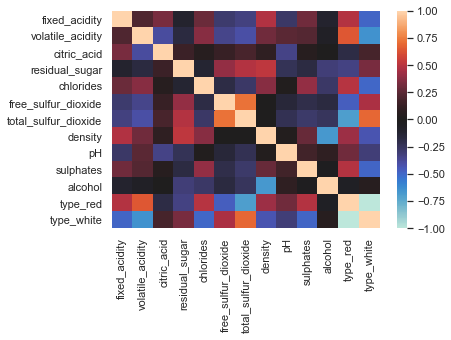

In [109]:
#Correlation in the X DataFrame
sns.heatmap(X.corr(),center=0)

--> The correlation matrix reveals that there is linear correlation between serveral variables as they are represented by the the lighter spots.

In [110]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=99,test_size=0.25)
X_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type_red,type_white
1964,6.8,0.31,0.42,6.9,0.046,50.0,173.0,0.9958,3.19,0.46,9.0,0,1
5382,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,1,0
707,7.2,0.18,0.45,4.4,0.046,57.0,166.0,0.9943,3.13,0.62,11.2,0,1
308,6.2,0.33,0.27,4.9,0.036,30.0,134.0,0.9927,3.20,0.42,10.4,0,1
1689,7.1,0.16,0.25,1.3,0.034,28.0,123.0,0.9915,3.27,0.55,11.4,0,1


--> The data set is split into training set (75%) and testing set (25%) and is used further for testing the model.

In [111]:
y_test.head()

1964    5
5382    6
707     6
308     7
1689    6
Name: quality, dtype: int64

In [112]:
#import Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

--> When fiting the model with the training set, we got and error message and we are asked to scale the data or to maximize the number of iterations.

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) #use only training set 
                                           #to make any adjustments to the model
                                           #during training

--> We use the standard scalar to scale the training X attributes to smaller scale.

In [114]:
#Let's create a model again using max iterations to 300
model = LogisticRegression(max_iter=300)

In [115]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=300)

--> The scaled X variables and the y training set is fit in to the model and the code ran successfully.

In [116]:
model.intercept_

array([-2.0420385 ,  0.14334001,  2.58131718,  3.15922237,  1.59043875,
       -0.60170617, -4.83057364])

--> The intercepts are as above for the quality levels

In [117]:
model.coef_

array([[ 7.45282306e-01,  9.32817286e-01, -2.97839355e-01,
        -3.72461816e-02,  7.91274817e-01,  6.10980287e-01,
        -7.26350991e-01, -8.67688597e-04,  3.10772527e-01,
        -4.61796147e-01, -5.97750326e-01, -6.61758401e-01,
         6.61758401e-01],
       [-2.67024012e-01,  7.71996223e-01, -7.41483241e-02,
        -7.10222537e-01,  1.05559799e-01, -6.90006078e-01,
         4.77637170e-02,  7.23512434e-01, -2.80840467e-01,
        -9.20142125e-02, -7.32025053e-01, -4.49965565e-01,
         4.49965565e-01],
       [-6.56834907e-01,  1.60572738e-01, -5.43495852e-02,
        -5.25942704e-01,  2.70919539e-01, -3.56580781e-01,
         5.71308053e-01,  7.02069964e-01, -5.98055721e-01,
        -1.05984229e-01, -7.62989932e-01,  2.76491060e-01,
        -2.76491060e-01],
       [-6.47860803e-01, -4.32385439e-01, -3.55655696e-02,
        -2.74671689e-01,  2.02174537e-01, -1.27870452e-01,
         2.74433104e-01,  5.72452143e-01, -4.34422198e-01,
         1.09982491e-01,  1.36596634e

In [118]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

--> To do the prediction, we need to scale the X test using the standard scalar

In [119]:
#Predict_proba gives the probabilities P(y=Ci|x)
probabilities_test = model.predict_proba(X_test_scaled).round(3)
probabilities_test[0:5]

array([[0.004, 0.034, 0.613, 0.322, 0.024, 0.003, 0.   ],
       [0.001, 0.003, 0.048, 0.601, 0.306, 0.042, 0.   ],
       [0.001, 0.004, 0.117, 0.644, 0.206, 0.027, 0.   ],
       [0.003, 0.046, 0.37 , 0.481, 0.088, 0.012, 0.   ],
       [0.001, 0.012, 0.084, 0.493, 0.375, 0.033, 0.002]])

--> The predict_proba method gives the probability of the target variable falling in to each category. And we select the category that has the most likelyhood to contain the target variable for any instance of the given test data.

In [120]:
#Whereas predict method gives the class prediction of y values
y_predict = model.predict(X_test_scaled)
y_predict[0:5]

array([5, 6, 6, 6, 6], dtype=int64)

-->The model.predict predicts the category of target variable for each instance of the given test data.

In [121]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.5558889722430608

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.5558889722430608

--> The Accuracy of the logistic regression model can be obtained by model.score or accuracy_score which is = 0.5558

In [123]:
X_scaled = sc.fit_transform(X)
crossvalscore = cross_val_score(LogisticRegression(max_iter=300),X_scaled,y,cv=4)
print(crossvalscore)
Avg_crossvalscore = np.average(crossvalscore)
print("K-Fold Cross validation score :",Avg_crossvalscore)

[0.53488372 0.5533033  0.5533033  0.55105105]
K-Fold Cross validation score : 0.5481353446469726


In [124]:
cm1 = confusion_matrix(y_test,y_predict)
cm1

array([[  0,   0,   3,   1,   0,   1],
       [  0,   3,  35,  16,   0,   0],
       [  1,   1, 271, 171,   2,   0],
       [  0,   1, 132, 410,  46,   1],
       [  0,   0,   9, 134,  57,   0],
       [  0,   0,   1,  22,  15,   0]], dtype=int64)

--> The confusion matrix will give an idea about the correct and incorrect predictions made by the model for each category of the target variable.

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.60      0.06      0.10        54
           5       0.60      0.61      0.60       446
           6       0.54      0.69      0.61       590
           7       0.47      0.28      0.36       200
           8       0.00      0.00      0.00        38

    accuracy                           0.56      1333
   macro avg       0.37      0.27      0.28      1333
weighted avg       0.54      0.56      0.53      1333



--> Inferences:
                The accuracy of the model is only 56% and hence this logistic regression model is not a good choice to predict the wine quality for the given data set. May be a different model (non-linear) will be better to predict the output variable as the correlation study suggests.